In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import image_utils
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

In [2]:
data_path = '../../data/fashion/dresses/'
feature_path = '../../data/fashion_features/features114/dresses/'

In [41]:
image_utils.download_feature_vectors_114(data_path, feature_path)

Downloaded 0 / 15723


KeyboardInterrupt: 

In [30]:
filenames = [file.split('.')[0] for file in os.listdir(data_path) if file.endswith('.jpg')]
# filenames_test = filenames[:10]
# filenames = filenames[10:]

In [31]:
len(os.listdir(feature_path))

5908

In [32]:
features = np.array([image_utils.load_feature_vector(os.path.join(feature_path, file + '.npy')) 
                       for file in filenames])
features_dist = pd.DataFrame(data=pairwise_distances(features), index=filenames, columns=filenames)

In [34]:
def get_closest_images(filenames, df_distances):
    df_sample = df_distances.loc[filenames].T
    
    for col in df_sample.columns:
        fig, axarr = plt.subplots(ncols=6, nrows=1, figsize=(12, 12))

        orig_img = Image.open(os.path.join(data_path, col + '.jpg'))
        axarr[0].imshow(orig_img)
        axarr[0].axis('off')

        best_imgs = df_distances[col].nsmallest(6).index[1:]
        for idx, img_path in enumerate(best_imgs):
            ax = axarr[idx+1]
            img = Image.open(os.path.join(data_path, img_path + '.jpg'))
            ax.imshow(img)
            ax.axis('off')
        plt.tight_layout()

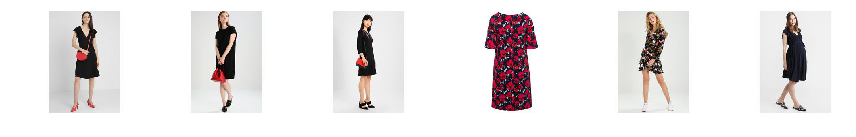

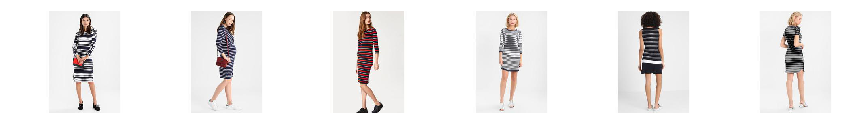

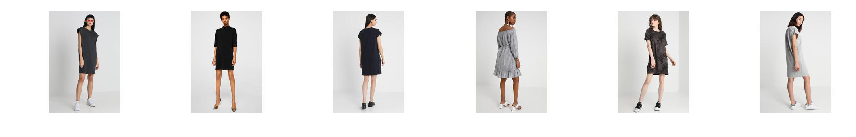

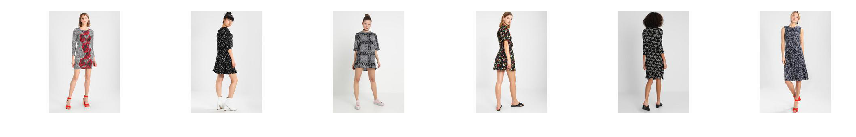

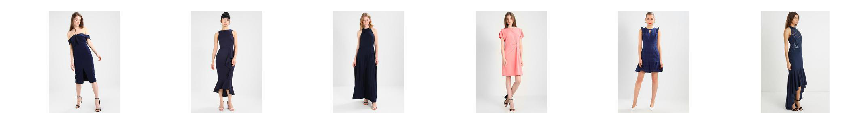

In [37]:
test_files = filenames[:5]
get_closest_images(test_files, features_dist)

In [42]:
data_path_models = '../../data/zalando_models/kleider_one/'
feature_path_models = '../../data/models_features/114/dresses/'
filenames_models = [file.split('.')[0] for file in os.listdir(data_path_models) if file.endswith('.jpg')]
features_models = np.array([image_utils.load_feature_vector(os.path.join(feature_path_models, file + '.npy')) 
                       for file in filenames_models])

data_path_dresses = '../../data/fashion/dresses/'
feature_path_dresses = '../../data/fashion_features/features114/dresses/'
filenames_dresses = [file.split('.')[0] for file in os.listdir(data_path_dresses) if file.endswith('.jpg')]
features_dresses = np.array([image_utils.load_feature_vector(os.path.join(feature_path_dresses, file + '.npy')) 
                       for file in filenames_dresses])

In [48]:
dist = pairwise_distances(features_dresses, features_models)

In [49]:
df_dist = pd.DataFrame(data=dist, index=filenames_dresses, columns=filenames_models)

In [50]:
df_dist.head()

,SO821C049-Q11,ED121C0D1-K11,CH621C01V-Q11,DP521C1E9-G11,TRF21C00S-K11,WL521C0GL-Q11,NL021C0UP-Q11,SU221C0AZ-Q11,M0Q21C0D5-Q11,LT121C022-K11,...,Y0121C0G7-Q11,EX121C06C-K11,QS021C02J-K11,Z1721C02X-Q11,PID21C00Q-T11,LI721C0ZV-Q11,MF921C0L4-Q11,KS821C01I-Q11,Y0121C0F7-Q11,H0421C00V-Q11
abf967da89772c678115d20e4955ed2c,1248.973979,1257.856908,1142.442559,1121.179736,1308.664969,1120.222299,1240.665547,1154.436226,1313.419583,1236.398803,...,1239.664471,1297.919104,1159.049179,1104.531575,1284.226616,1305.838045,1287.180640,1303.459627,1341.323227,1251.515881
SO821C049-Q11,1181.798629,1309.539614,1164.548410,1185.715818,1124.726633,1055.321752,1134.000441,1226.536995,1286.466090,1307.421891,...,1187.327251,1313.528074,1034.298313,1166.511894,1212.729154,1241.624339,1325.319584,1331.644472,1109.945945,1225.585574
34cc1ed5706f2ec4d60e26758a1072a9,1418.027503,1412.312288,1262.916070,1259.808716,1316.350257,1195.163587,1285.782641,1199.427780,1318.614045,1332.326537,...,1269.585759,1380.820770,1110.307615,1240.901285,1355.682854,1365.703116,1348.946255,1214.728365,1237.932955,1186.293387
6694d521afeed06750f126737518cbe6,1366.653943,1338.740826,1157.492117,1161.522707,1369.055514,1105.185505,1238.887404,1310.786787,1323.181016,1207.615419,...,1163.863824,1252.863520,1254.503886,1179.192520,1315.082127,1337.048241,1274.781942,1266.746226,1324.621833,1190.308783
9806275,1341.682153,1334.843437,1263.131030,1228.119294,1262.975455,1221.903842,1128.887063,1319.103483,1317.318488,1298.849106,...,1229.100891,1216.482223,1173.695020,1202.250806,1265.075887,1319.543861,1165.919809,1126.306353,1311.638289,1086.455245


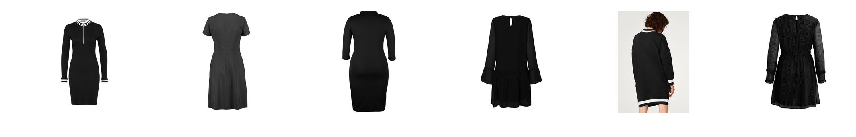

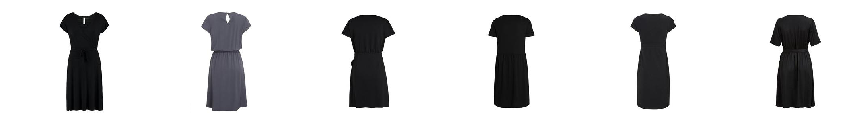

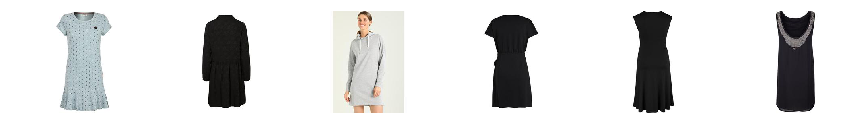

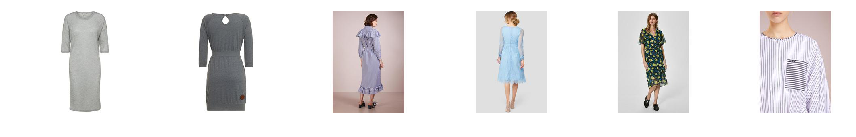

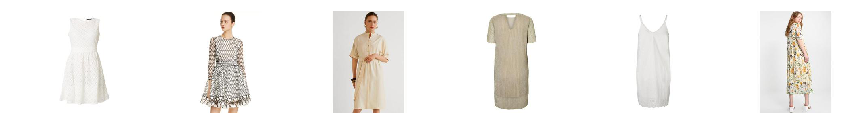

In [53]:
test_files = filenames_dresses[:5]
df_sample = df_dist.loc[test_files].T

for col in df_sample.columns:
    fig, axarr = plt.subplots(ncols=6, nrows=1, figsize=(12, 12))

    orig_img = Image.open(os.path.join(data_path_dresses, col + '.jpg'))
    axarr[0].imshow(orig_img)
    axarr[0].axis('off')

    best_imgs = df_sample[col].nsmallest(6).index[1:]
    for idx, img_path in enumerate(best_imgs):
        ax = axarr[idx+1]
        img = Image.open(os.path.join(data_path_models, img_path + '.jpg'))
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()